## Intro a los modelos de clasificación
Se construirán modelos de clasificación a partir de un conjunto de algoritmos de inferencia y el dataset de Iris, los cuales serán evaluados con los siguientes métodos:

1 clasificador y hold-out
Múltiples clasificadores y hold-out
1 clasificador y validación cruzada
Múltiples clasificadores y validación cruzada
Recordar que los modelos una vez evaluados, pueden ser reentrenados con el conjunto completo de datos para hacer predicciones posteriores.

### Datos

In [2]:
# Importar datos
from sklearn.datasets import load_iris
iris = load_iris()

# Crear un DataFrame de Pandas
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Separar vector de características (X_i) y etiquetas (y)
X = df.drop('species', axis=1)
y = df['species']

### Algoritmos de inferencia

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Establecer algoritmos de inferencia
models = {
    "Naive Bayes": GaussianNB(),
    "C4.5 (Decision Tree)": DecisionTreeClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

### Hold-out validation

In [10]:
# Partición de los datos 80% training, 20% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


### Un modelo 

In [13]:
# Construir modelo con datos de training
clf = GaussianNB().fit(X_train, y_train)

# Evaluar modelo con datos de testing (mostrar accuracy)
clf.score(X_test, y_test)

0.9666666666666667

### Varios modelos

In [18]:
# Construir modelo con datos de training
clf = GaussianNB().fit(X_train, y_train)

# Evaluar modelo con datos de testing (mostrar accuracy)
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)

0.9666666666666667


<Axes: >

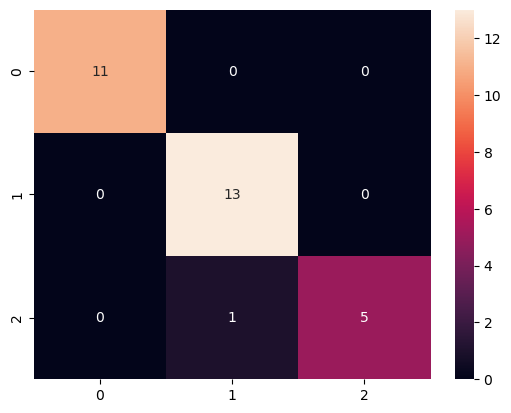

In [26]:
import numpy as np
import seaborn as sns
def calculate_confusion_matrix(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    labels = np.unique(y_true)
    confusion_matrix = np.zeros((len(labels), len(labels)))
    for i in range(y_true.shape[0]):
        true_index = np.where(labels == y_true[i])[0]
        pred_index = np.where(labels == y_pred[i])[0]
        confusion_matrix[true_index,pred_index] += 1

    return confusion_matrix
    
confusion_matrix = calculate_confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='.0f')

In [30]:
results = {} 
for name, model in models.items():
    clf = model.fit(X_train, y_train)
    cv_results = clf.score(X_test, y_test)
    results[name] = cv_results
    print(f"{name}: {cv_results:.4f}")

Naive Bayes: 0.9667
C4.5 (Decision Tree): 1.0000
k-Nearest Neighbors: 0.9667
Support Vector Machine: 1.0000


In [32]:
from sklearn.model_selection import cross_val_score

clf = GaussianNB()

# Training y testing en una sola función
scores = cross_val_score(clf, X, y, cv=5)

print("Resultados para cada iteración: ", scores)

print("Resultado promedio: ", scores.mean())

Resultados para cada iteración:  [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Resultado promedio:  0.9533333333333334


In [34]:
from sklearn.model_selection import StratifiedKFold

# Realizar particiones de los datos 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Visualizar los índices para las particiones
#for train, test in skf.split(X, y): print("%s %s" % (train, test))

In [36]:
acc_scores = []

for train_index, test_index in skf.split(X, y):
    # Particiones para training
    X_train_fold = X.iloc[train_index]
    y_train_fold = y.iloc[train_index]
    # Particiones para testing
    X_test_fold = X.iloc[test_index]
    y_test_fold = y.iloc[test_index]
    # Entrenamiento del modelo
    clf = GaussianNB().fit(X_train_fold, y_train_fold)
    # Evaluación de modelo y se acumula el accuracy
    acc = clf.score(X_test_fold, y_test_fold)
    print("Fold accuracy: ", acc)
    acc_scores.append(acc)    
    y_pred_fold = clf.predict(X_test_fold)

from statistics import mean, stdev
print('Overall Accuracy:', mean(acc_scores))
print('Standard Deviation is:', stdev(acc_scores))

Fold accuracy:  0.9666666666666667
Fold accuracy:  0.9666666666666667
Fold accuracy:  0.9333333333333333
Fold accuracy:  0.9666666666666667
Fold accuracy:  0.9666666666666667
Overall Accuracy: 0.96
Standard Deviation is: 0.014907119849998594


<Axes: >

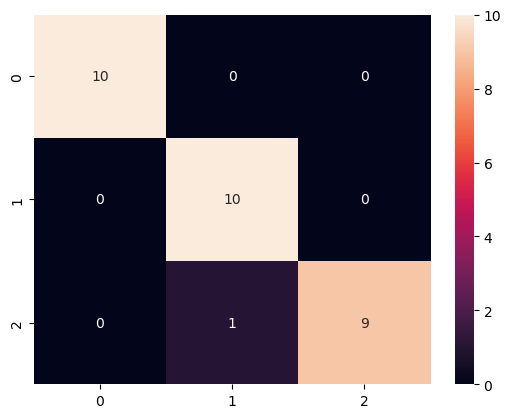

In [38]:
confusion_matrix = calculate_confusion_matrix(y_test_fold, y_pred_fold)
sns.heatmap(confusion_matrix, annot=True, fmt='.0f')

Fold accuracy:  0.9666666666666667
Fold accuracy:  0.9666666666666667
Fold accuracy:  0.9333333333333333
Fold accuracy:  0.9666666666666667
Fold accuracy:  0.9666666666666667
Naive Bayes: Avg accuracy 0.9600
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Fold accuracy:  0.9666666666666667
Fold accuracy:  0.9666666666666667
Fold accuracy:  0.8666666666666667
Fold accuracy:  0.9666666666666667
Fold accuracy:  0.9666666666666667
C4.5 (Decision Tree): Avg accuracy 0.9467
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.

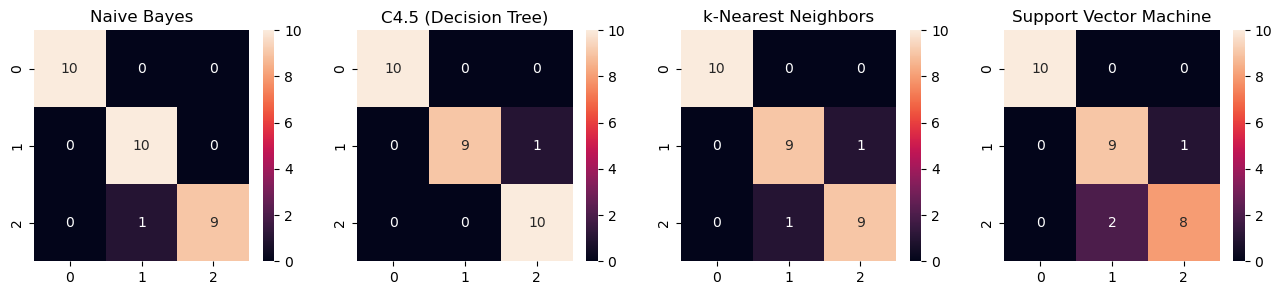

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
import pandas as pd
fig, axs = plt.subplots(1,4)
i = 0

results_data = {'model': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
# Iterar sobre los modelos
for name, model in models.items():
    acc_scores = []
    # Iterar sobre las particiones de los datos
    for train_index, test_index in skf.split(X, y):
        # Particiones para training y testing
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        # Entrenamiento y evaluación del modelo
        model.fit(X_train_fold, y_train_fold)
        y_predict = model.predict(X_test_fold)
        acc = accuracy_score(y_test_fold, y_predict)
        print("Fold accuracy: ", acc)
        acc_scores.append(acc)

        results_data['model'].append(name)
        results_data['accuracy'].append(acc)
        results_data['precision'].append(precision_score(y_test_fold, y_predict, average='macro'))
        results_data['recall'].append(recall_score(y_test_fold, y_predict, average='macro'))
        results_data['f1'].append(f1_score(y_test_fold, y_predict, average='macro'))

    
    confusion_matrix = calculate_confusion_matrix(y_test_fold, y_predict)
    sns.heatmap(confusion_matrix, annot=True, fmt='.0f', ax=axs[i])
    axs[i].set_title(name)
    i += 1
        
    avg_acc = sum(acc_scores)/len(acc_scores)
    print(f"{name}: Avg accuracy {avg_acc:.4f}")
    print(classification_report(y_test_fold, y_predict))

fig.set_figheight(3)
fig.set_figwidth(16)

In [44]:
results_data = pd.DataFrame(results_data)
results_data.head()

,model,accuracy,precision,recall,f1
0,Naive Bayes,0.966667,0.969697,0.966667,0.966583
1,Naive Bayes,0.966667,0.969697,0.966667,0.966583
2,Naive Bayes,0.933333,0.944444,0.933333,0.932660
3,Naive Bayes,0.966667,0.969697,0.966667,0.966583
4,Naive Bayes,0.966667,0.969697,0.966667,0.966583


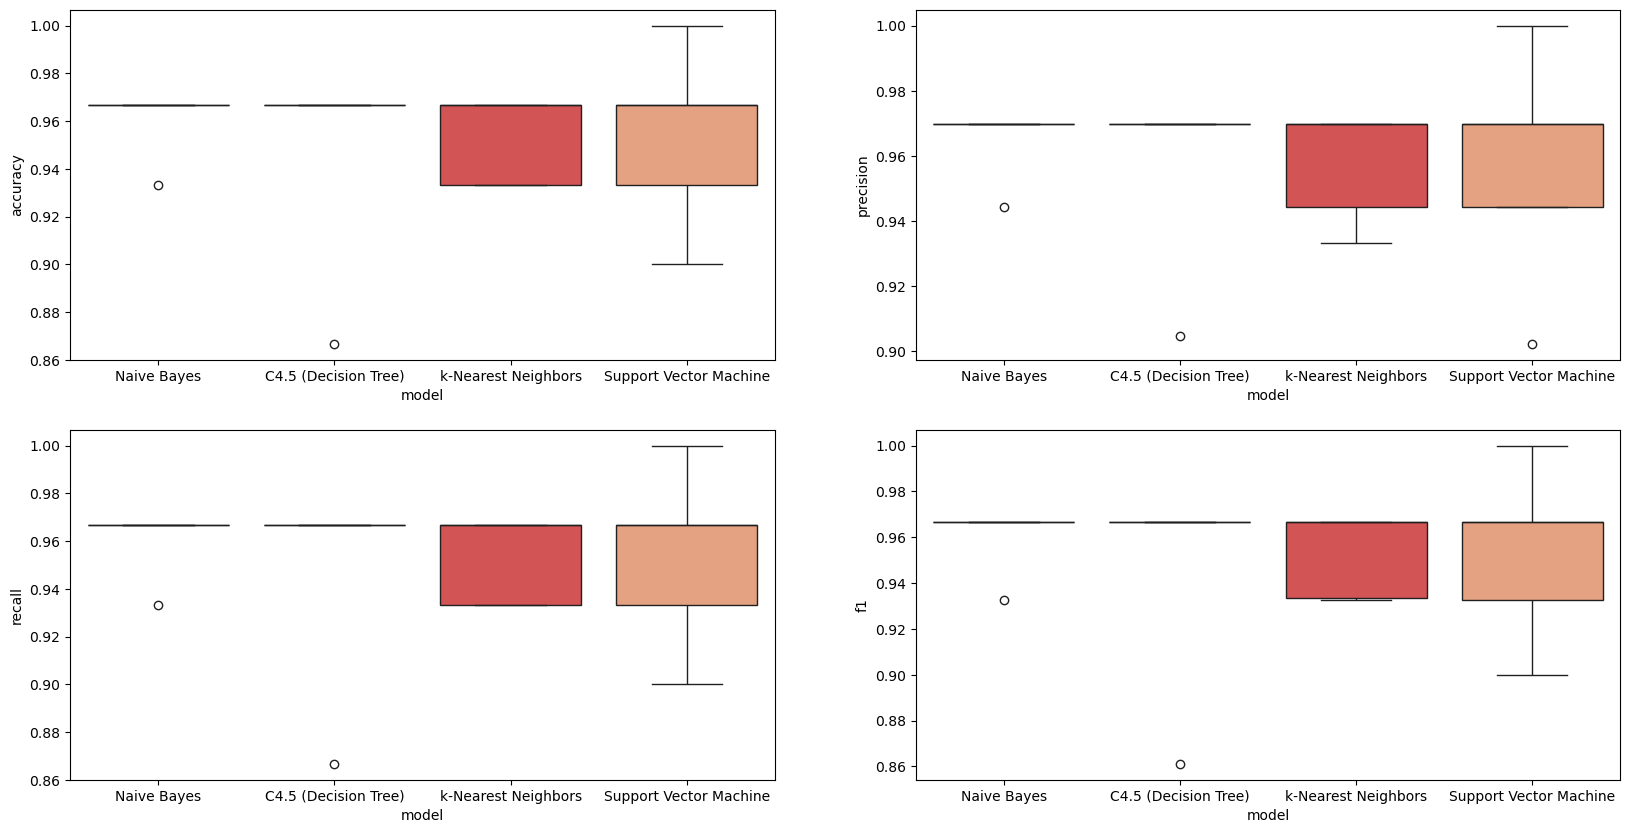

In [46]:
fig, axs = plt.subplots(2,2)
sns.boxplot(data=results_data, x='model', y='accuracy', palette='rocket', hue='model', ax=axs[0,0])
sns.boxplot(data=results_data, x='model', y='precision', palette='rocket', hue='model', ax=axs[0,1])
sns.boxplot(data=results_data, x='model', y='recall', palette='rocket', hue='model', ax=axs[1,0])
sns.boxplot(data=results_data, x='model', y='f1', palette='rocket', hue='model', ax=axs[1,1])


fig.set_figheight(10)
fig.set_figwidth(20)